Vamos a simular la difusión de un grano de polen, utilizando el método de integración de Leap-Frog. La difusión será unidimensional:


In [25]:
%%writefile DifusionGranoPolen.cpp

#include <iostream>
#include <cmath>
#include "Random64.h"
using namespace std;

const double Gamma=16.0;
const double Deltat=0.01;
const double alpha=1-exp(-Gamma*Deltat);

//Declaración de la clase:
class Cuerpo;

//Declaración de la interfase:
class Cuerpo{
  private:
    double x,V,F; double m,R;
  public:
    void Inicie(double x0, double V0, double m0, double R0);
    void CalculeFuerza(void);
    void Arranque(double Deltat);
    void Muevase(double Deltat, double kT, Crandom & ran64);
    void Dibujese(void);
    double Getx(void){return x;}; // Inline
    double GetV(void){return V;}; // Inline
};

//Implementación de las funciones:
void Cuerpo::Inicie(double x0,double V0,double m0,double R0){
  x=x0; V=V0; m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F=0;
}
void Cuerpo::Arranque(double Deltat){
  //Algoritmo de Leap-Frog
  V-=F*(Deltat/(2*m));
}
void Cuerpo::Muevase(double Deltat, double kT, Crandom & ran64){
  //Algoritmo browniano de Leap-Frog (van Gunsteren)
  double Vprime=V+F*Deltat;
  double DeltaV=-alpha*Vprime+sqrt(alpha*(2-alpha)*kT/m)*ran64.gauss(0,1);
  x+=(Vprime+DeltaV/2)*Deltat;
  V=Vprime+DeltaV;
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<x<<"+"<<R<<"*cos(t),"<<0<<"+"<<R<<"*sin(t)";
}

//----------- Funciones Globales -----------

//Funciones de animación:
void InicieAnimacion(void){
  cout<<"set terminal gif animate"<<endl;
  cout<<"set output 'PolenLF.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-10:10]"<<endl;
  cout<<"set yrange[-2:2]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange[0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;
}

void InicieCuadro(void){
  cout<<"plot 0,0 ";
}

void TermineCuadro(void){
  cout<<endl;
}

int main(){
  Crandom ran64(1);
  double x0=0,V0=0,R0=1,m0=1;
  double kT=4;
  double t, ttotal=10;
  int Ncuadros=500; double tdibujo,tcuadro=ttotal/Ncuadros;
  Cuerpo Polen;
  //InicieAnimacion();
  //----------(x0,V0,m0,R0)
  Polen.Inicie(x0,V0,m0,R0);
  for(t=tdibujo=0;t<ttotal;t+=Deltat,tdibujo+=Deltat){
    Polen.CalculeFuerza();
    Polen.Arranque(Deltat);
    if(tdibujo>tcuadro){
      cout<<t<<" "<<Polen.Getx()<<" "<<Polen.GetV()<<endl;
      /*
      InicieCuadro();
      Polen.Dibujese();
      TermineCuadro();
      tdibujo=0;
      */
    }
    Polen.CalculeFuerza();
    Polen.Muevase(Deltat,kT,ran64);
  }
  return 0;
}

Overwriting DifusionGranoPolen.cpp


In [18]:
%%shell
g++ DifusionGranoPolen.cpp
./a.out > datos.dat

Text(0.5, 1.0, 'Posiciones en la difusión de un grano de polen en 1D')

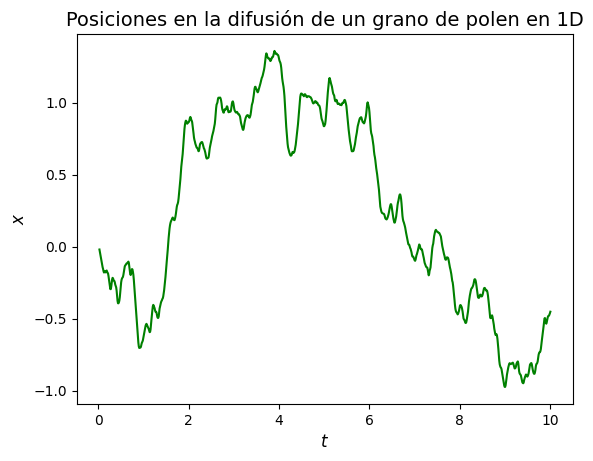

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datos.dat',sep=' ',names=['t','x','V'])

plt.plot(datos['t'],datos["x"], "green")
plt.xlabel("$t$",size=12)
plt.ylabel("$x$",size=12)
plt.title("Posiciones en la difusión de un grano de polen en 1D",size=14)

Text(0.5, 1.0, 'Velocidades en la difusión de un grano de polen en 1D')

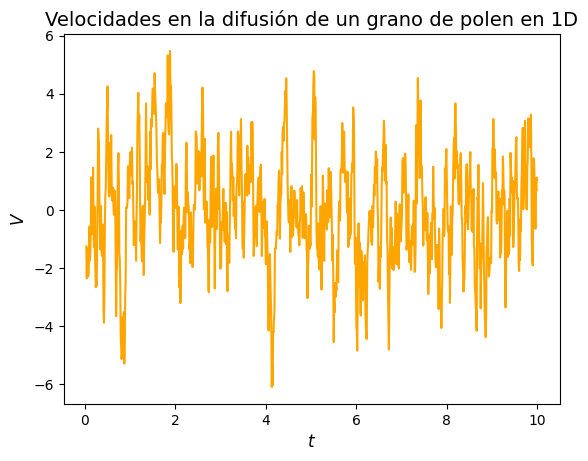

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datos.dat',sep=' ',names=['t','x','V'])

plt.plot(datos['t'],datos["V"], "orange")
plt.xlabel("$t$",size=12)
plt.ylabel("$V$",size=12)
plt.title("Velocidades en la difusión de un grano de polen en 1D",size=14)

Para hacer una animación del movimiento del grano de polen, hacemos algunas modificaciones al código; la animación quedará guardada como un archivo .GIF:

In [26]:
%%writefile PolenAnimado.cpp

#include <iostream>
#include <cmath>
#include "Random64.h"
using namespace std;

const double Gamma=16.0;
const double Deltat=0.01;
const double alpha=1-exp(-Gamma*Deltat);

//Declaración de la clase:
class Cuerpo;

//Declaración de la interfase:
class Cuerpo{
  private:
    double x,V,F; double m,R;
  public:
    void Inicie(double x0, double V0, double m0, double R0);
    void CalculeFuerza(void);
    void Arranque(double Deltat);
    void Muevase(double Deltat, double kT, Crandom & ran64);
    void Dibujese(void);
    double Getx(void){return x;}; // Inline
    double GetV(void){return V;}; // Inline
};

//Implementación de las funciones:
void Cuerpo::Inicie(double x0,double V0,double m0,double R0){
  x=x0; V=V0; m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F=0;
}
void Cuerpo::Arranque(double Deltat){
  //Algoritmo de Leap-Frog
  V-=F*(Deltat/(2*m));
}
void Cuerpo::Muevase(double Deltat, double kT, Crandom & ran64){
  //Algoritmo browniano de Leap-Frog (van Gunsteren)
  double Vprime=V+F*Deltat;
  double DeltaV=-alpha*Vprime+sqrt(alpha*(2-alpha)*kT/m)*ran64.gauss(0,1);
  x+=(Vprime+DeltaV/2)*Deltat;
  V=Vprime+DeltaV;
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<x<<"+"<<R<<"*cos(t),"<<0<<"+"<<R<<"*sin(t)";
}

//----------- Funciones Globales -----------

//Funciones de animación:
void InicieAnimacion(void){
  cout<<"set terminal gif animate"<<endl;
  cout<<"set output 'PolenLF.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-10:10]"<<endl;
  cout<<"set yrange[-2:2]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange[0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;
}

void InicieCuadro(void){
  cout<<"plot 0,0 ";
}

void TermineCuadro(void){
  cout<<endl;
}

int main(){
  Crandom ran64(1);
  double x0=0,V0=0,R0=1,m0=1;
  double kT=4;
  double t, ttotal=100;
  int Ncuadros=5000; double tdibujo,tcuadro=ttotal/Ncuadros;
  Cuerpo Polen;
  InicieAnimacion();
  //----------(x0,V0,m0,R0)
  Polen.Inicie(x0,V0,m0,R0);
  for(t=tdibujo=0;t<ttotal;t+=Deltat,tdibujo+=Deltat){
    Polen.CalculeFuerza();
    Polen.Arranque(Deltat);
    if(tdibujo>tcuadro){
      //cout<<t<<" "<<Polen.Getx()<<" "<<Polen.GetV()<<endl;

      InicieCuadro();
      Polen.Dibujese();
      TermineCuadro();
      tdibujo=0;

    }
    Polen.CalculeFuerza();
    Polen.Muevase(Deltat,kT,ran64);
  }
  return 0;
}

Writing PolenAnimado.cpp


In [27]:
%%shell
g++ PolenAnimado.cpp
./a.out > "Instrucciones - Polen.txt"

Consideremos ahora una cantidad N de granos de polen:

In [31]:
%%writefile GranosPolen.cpp

#include <iostream>
#include <cmath>
#include "Random64.h"
using namespace std;

const double Gamma=16.0;
const double Deltat=0.01;
const double alpha=1-exp(-Gamma*Deltat);
const int N=1000;

//Declaración de la clase:
class Cuerpo;

//Declaración de la interfase:
class Cuerpo{
  private:
    double x,V,F; double m,R;
  public:
    void Inicie(double x0, double V0, double m0, double R0);
    void CalculeFuerza(void);
    void Arranque(double Deltat);
    void Muevase(double Deltat, double kT, Crandom & ran64);
    void Dibujese(void);
    double Getx(void){return x;}; // Inline
    double GetV(void){return V;}; // Inline
};

//Implementación de las funciones:
void Cuerpo::Inicie(double x0,double V0,double m0,double R0){
  x=x0; V=V0; m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F=0;
}
void Cuerpo::Arranque(double Deltat){
  //Algoritmo de Leap-Frog
  V-=F*(Deltat/(2*m));
}
void Cuerpo::Muevase(double Deltat, double kT, Crandom & ran64){
  //Algoritmo browniano de Leap-Frog (van Gunsteren)
  double Vprime=V+F*Deltat;
  double DeltaV=-alpha*Vprime+sqrt(alpha*(2-alpha)*kT/m)*ran64.gauss(0,1);
  x+=(Vprime+DeltaV/2)*Deltat;
  V=Vprime+DeltaV;
}
void Cuerpo::Dibujese(void){
  cout<<" , "<<x<<"+"<<R<<"*cos(t),"<<0<<"+"<<R<<"*sin(t)";
}

//----------- Funciones Globales -----------

//Funciones de animación:
void InicieAnimacion(void){
  cout<<"set terminal gif animate"<<endl;
  cout<<"set output 'PolenLF.gif'"<<endl;
  cout<<"unset key"<<endl;
  cout<<"set xrange[-10:10]"<<endl;
  cout<<"set yrange[-2:2]"<<endl;
  cout<<"set size ratio -1"<<endl;
  cout<<"set parametric"<<endl;
  cout<<"set trange[0:7]"<<endl;
  cout<<"set isosamples 12"<<endl;
}

void InicieCuadro(void){
  cout<<"plot 0,0 ";
}

void TermineCuadro(void){
  cout<<endl;
}

double Sigma2(Cuerpo * Polen){
  double suma,xprom,sigma2;
  int i;
  //Calculamos primero xprom:
  for(suma=0,i=0;i<N;i++)
    suma+=Polen[i].Getx();
  xprom=suma/N;
  //Calculamos sigma2
  for(suma=0,i=0;i<N;i++)
    suma+=pow(Polen[i].Getx()-xprom,2.0);
  sigma2=suma/(N-1);
  return sigma2;
}

int main(){
  Crandom ran64(1);
  double x0=0,V0=0,R0=1,m0=1;
  double kT=4;
  double t, ttotal=1;
  int i,Ncuadros=500; double tdibujo,tcuadro=ttotal/Ncuadros;
  Cuerpo Polen[N];
  //InicieAnimacion();
  //----------(x0,V0,m0,R0)
  for(i=0;i<N;i++)  Polen[i].Inicie(x0,V0,m0,R0);
  for(t=tdibujo=0;t<ttotal;t+=Deltat,tdibujo+=Deltat){
    for(i=0;i<N;i++)  Polen[i].CalculeFuerza();
    for(i=0;i<N;i++)  Polen[i].Arranque(Deltat);
    if(tdibujo>tcuadro){
      cout<<t<<" "<<Sigma2(Polen)<<endl; // (A)
      /*
      InicieCuadro();
      Polen.Dibujese();
      TermineCuadro();
      tdibujo=0;
      */
    }
    for(i=0;i<N;i++)  Polen[i].CalculeFuerza();
    for(i=0;i<N;i++)  Polen[i].Muevase(Deltat,kT,ran64);
  }
  //Para ver las posiciones, descomentar esto y comentar (A)
  //for(i=0;i<N;i++)  cout<<Polen[i].Getx()<<endl;
  return 0;
}

Overwriting GranosPolen.cpp


In [32]:
%%shell
g++ GranosPolen.cpp
./a.out > datosgranos.dat

Text(0.5, 1.0, 'Cambio de la varianza en función del tiempo')

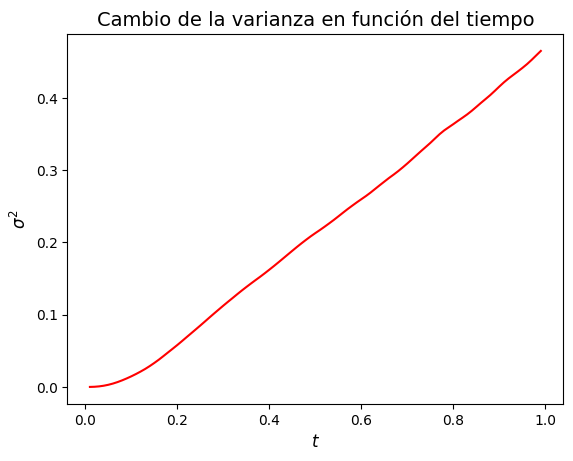

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datosgranos.dat',sep=' ',names=['t','sigma2'])
plt.plot(datos["t"],datos["sigma2"], 'red')
plt.ylabel("$\sigma^2$",size=12)
plt.xlabel("$t$",size=12)
plt.title("Cambio de la varianza en función del tiempo",size=14)

Para observar la distribución de las posiciones, tenemos lo siguiente:

Text(0.5, 1.0, 'Posiciones en la difusión de 100 granos de polen en t=1')

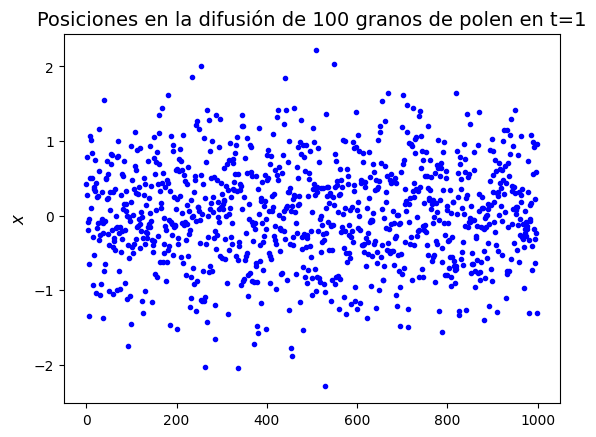

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N=1000
datos=pd.read_csv('./datosgranos.dat',sep=' ',names=['x'])
indices=range(N)
plt.plot(indices,datos["x"], '.b')
plt.ylabel("$x$",size=12)
plt.title("Posiciones en la difusión de 100 granos de polen en t=1",size=14)